In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls

gdrive/  sample_data/


In [4]:
cd gdrive/My\ Drive/hbi2019/sra_food

/content/gdrive/My Drive/hbi2019/sra_food


In [0]:
import pandas as pd
import numpy as np

In [0]:
# 저번엔 한 locus에 대한 것이었으므로 이번엔 모든 locus에 대해 할 것

df_food = pd.read_pickle('./gt_food_23accesions.pkl')

In [7]:
df_food.head()

# columns : NCBI assign sample's, E.coli's ID
# index   : genotype in locus
# values  : genotype in each E.coli's locus

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,CC,CC,CC,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC


In [8]:
# Hardy weinberg equilibrium
# Almost locus have 2 alleles

df_food.loc[0]
# index 0 = first locus
# C allele has p frequency
# A allele has q frequency

# key   : 23 e.coli
# value : genotype (allele 2개)

SRR7501150    CC
SRR7501160    CC
SRR7501167    AA
SRR7501181    AA
SRR7505765    AA
SRR7505768    CC
SRR7505771    CC
SRR7505773    AA
SRR7505774    CC
SRR7505779    CC
SRR7505780    CC
SRR7505869    CC
SRR7505873    CC
SRR7505877    CC
SRR7505879    AA
SRR7505880    AA
SRR7505882    CC
SRR7505889    AA
SRR7505890    CC
SRR7511299    CC
SRR7527615    CC
SRR7834586    AA
SRR7850029    AA
Name: 0, dtype: object

In [9]:
type(df_food.loc[0]) # Series datatype have .values method returning numpy array datatype

pandas.core.series.Series

In [10]:
df_food.loc[0].values

# dataframe datatype에서 loc을 사용해 series 추출 가능, 거기서 .value로 array type 추출 가능

array(['CC', 'CC', 'AA', 'AA', 'AA', 'CC', 'CC', 'AA', 'CC', 'CC', 'CC',
       'CC', 'CC', 'CC', 'AA', 'AA', 'CC', 'AA', 'CC', 'CC', 'CC', 'AA',
       'AA'], dtype=object)

In [11]:
type(df_food.loc[0].values)

numpy.ndarray

In [12]:
for x in df_food.loc[0].values :
  print(x)
  
# we can get only genotype
# type은 str

CC
CC
AA
AA
AA
CC
CC
AA
CC
CC
CC
CC
CC
CC
AA
AA
CC
AA
CC
CC
CC
AA
AA


In [13]:
for x in df_food.loc[0].values :
  print(list(x))

['C', 'C']
['C', 'C']
['A', 'A']
['A', 'A']
['A', 'A']
['C', 'C']
['C', 'C']
['A', 'A']
['C', 'C']
['C', 'C']
['C', 'C']
['C', 'C']
['C', 'C']
['C', 'C']
['A', 'A']
['A', 'A']
['C', 'C']
['A', 'A']
['C', 'C']
['C', 'C']
['C', 'C']
['A', 'A']
['A', 'A']


In [0]:
alleles = []

for x in df_food.loc[0].values :
  alleles += list(x)

In [15]:
alleles

['C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'A',
 'A',
 'C',
 'C',
 'A',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'A',
 'A']

In [16]:
len(alleles)

46

**allele frquency 알아보는 방법 세가지**

1. 직접 count하고 총 갯수로 직접 나눠주어 frequency 알아보기

In [17]:
alleles.count('C'), alleles.count('A')

(28, 18)

In [18]:
alleles.count('C')/len(alleles)

0.6086956521739131

In [19]:
alleles.count('A')/len(alleles)

0.391304347826087

2. 함수를 사용해 count해준 뒤 총 갯수로 직접 나눠주어 frequency 알아보기

In [0]:
from collections import Counter

In [21]:
Counter(alleles)

Counter({'A': 18, 'C': 28})

In [0]:
dic_allele_count = dict(Counter(alleles))

In [23]:
dic_allele_count

{'A': 18, 'C': 28}

In [0]:
dic_allele_frq = {}

for key in dic_allele_count :
  frq = dic_allele_count[key] / len(alleles)
  dic_allele_frq[key] = frq

In [25]:
dic_allele_frq

{'A': 0.391304347826087, 'C': 0.6086956521739131}

3. 함수를 사용해 count해준 뒤 item fuction을 이용해 frequency 알아보기

In [0]:
dic_allele_frq = {x:y/len(alleles) for x,y in dic_allele_count.items()}

In [27]:
dic_allele_frq

{'A': 0.391304347826087, 'C': 0.6086956521739131}

In [28]:
dic_allele_count.items()

dict_items([('C', 28), ('A', 18)])

In [0]:
# Hardy weinberg equilibrium (HWE)
# p + q = 1
# p^2 + 2pq + q^2 = 1
# random mating 
# 같은 세대에 같은 수의 자손을 낳는다
# 돌연변이는 없다

In [0]:
# p^2
# q^2
# 2pq

from itertools import combinations_with_replacement

In [30]:
combinations_with_replacement(set(alleles), 2)

In [31]:
# 앞에 *을 달아 대괄호를 씌워주면 function의 결과를 강제로 보이게 함

[*combinations_with_replacement(set(alleles), 2)]

[('A', 'A'), ('A', 'C'), ('C', 'C')]

In [0]:
dic_gt_frq = {}
for allele1, allele2 in combinations_with_replacement(set(alleles), 2) :
  p = dic_allele_frq[allele1]
  q = dic_allele_frq[allele2]
  if allele1 == allele2 :
    gt_frq = p**2
  else :
    gt_frq = 2*p*q
  gt = allele1 + allele2
  dic_gt_frq[gt] = gt_frq

In [33]:
dic_gt_frq

{'AA': 0.15311909262759926,
 'AC': 0.4763705103969755,
 'CC': 0.37051039697542537}

In [0]:
dic_gt_count = {x:y*23 for x,y in dic_gt_frq.items()}

# allele은 2개(1쌍), genotype은 1개
# 23개 e.coli의 genotype이었으므로 23을 곱해주는 것

In [35]:
dic_gt_count

{'AA': 3.521739130434783, 'AC': 10.956521739130435, 'CC': 8.521739130434783}

In [36]:
df_food.loc[0].values

array(['CC', 'CC', 'AA', 'AA', 'AA', 'CC', 'CC', 'AA', 'CC', 'CC', 'CC',
       'CC', 'CC', 'CC', 'AA', 'AA', 'CC', 'AA', 'CC', 'CC', 'CC', 'AA',
       'AA'], dtype=object)

In [37]:
list(df_food.loc[0].values).count('AA')

9

In [0]:
gt_count_obs = []
for gt in dic_gt_count :
  # if gt is homo or hetero
  if len(set(list(gt))) == 1 : #homo : 'AA' 면 1, 'AC'면 2
    gt_count_obs.append(list(df_food.loc[0].values).count(gt))
  else : #hetero
    gt_num = list(df_food.loc[0].values).count(gt) + list(df_food.loc[0].values).count(gt[::-1])
    gt_count_obs.append(gt_num)

In [41]:
gt_count_obs

[9, 0, 14]

In [0]:
gt_count_est = [x for x in dic_gt_count.values()]

In [43]:
gt_count_est

[3.521739130434783, 10.956521739130435, 8.521739130434783]

chi2 test = chi-squared test

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoHbAFdKDw0tGhnWwmIm-dTlr9SaO2ILsJCIqWDnfTZbE0lvGa)

In [44]:
np.array(gt_count_obs) - np.array(gt_count_est)

#array는 각각 같은 index의 값들을 불러와준다

array([  5.47826087, -10.95652174,   5.47826087])

In [45]:
# chi2 test 공식대로 계산

((np.array(gt_count_obs) - np.array(gt_count_est))**2)/np.array(gt_count_est)

array([ 8.52173913, 10.95652174,  3.52173913])

In [0]:
chi2_value = np.sum(((np.array(gt_count_obs) - np.array(gt_count_est))**2)/np.array(gt_count_est))

In [47]:
chi2_value 

# p value will be 0, we cannot accept HWE

22.999999999999996

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Chi-square_distributionCDF-English.png/300px-Chi-square_distributionCDF-English.png)

In [48]:
from scipy.stats import chi2

chi2.sf(chi2_value, 1) 

# my p-value(-06은 0을 6번 앞으로 가란 뜻, 0.00000162001...)

1.6200139824664742e-06

In [0]:
pvalue = chi2.sf(chi2_value, 1)

In [0]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations_with_replacement
from scipy.stats import chi2

alleles = []

gt_pool = df_food.loc[999]

for x in gt_pool.values:
  alleles += list(x)

dic_allele_count = dict(Counter(alleles))
dic_allele_frq = {}
for key in dic_allele_count:
  frq                 = dic_allele_count[key] / len(alleles)
  dic_allele_frq[key] = frq
dic_allele_frq = {x:y/len(alleles) for x,y in dic_allele_count.items()}
# p^2
# q^2
# 2pq

dic_gt_frq = {}
for allele1, allele2 in combinations_with_replacement(set(alleles),2):
  p = dic_allele_frq[allele1]
  q = dic_allele_frq[allele2]
  if allele1 == allele2:
    gt_frq = p**2
  else:
    gt_frq = 2*p*q
  gt = allele1 + allele2
  dic_gt_frq[gt] = gt_frq
    
dic_gt_count = {x:y*len(gt_pool) for x,y in dic_gt_frq.items()}
gt_count_obs = []
for gt in dic_gt_count:
  # if gt is homo or hetero
  if len(set(list(gt))) == 1: # homo 
    gt_count_obs.append(list(gt_pool.values).count(gt))
  else: # hetero
    gt_num = list(gt_pool.values).count(gt) + list(gt_pool.values).count(gt[::-1])
    gt_count_obs.append(gt_num)
gt_count_est = [x for x in dic_gt_count.values()]
chi2_value = np.sum(((np.array(gt_count_obs) - np.array(gt_count_est))**2)/np.array(gt_count_est))
from scipy.stats import chi2
pvalue = chi2.sf(chi2_value,1)

In [51]:
pvalue

0.0020308039526055264

In [0]:
def get_HWE_pvalue(gt_pool) :

  alleles = []
  #gt_pool = df_food.loc[0]

  for x in gt_pool.values:
    alleles += list(x)

  dic_allele_count = dict(Counter(alleles))
  dic_allele_frq = {}
  for key in dic_allele_count:
    frq                 = dic_allele_count[key] / len(alleles)
    dic_allele_frq[key] = frq
  dic_allele_frq = {x:y/len(alleles) for x,y in dic_allele_count.items()}
  # p^2
  # q^2
  # 2pq

  dic_gt_frq = {}
  for allele1, allele2 in combinations_with_replacement(set(alleles),2):
    p = dic_allele_frq[allele1]
    q = dic_allele_frq[allele2]
    if allele1 == allele2:
      gt_frq = p**2
    else:
      gt_frq = 2*p*q
    gt = allele1 + allele2
    dic_gt_frq[gt] = gt_frq

  dic_gt_count = {x:y*len(gt_pool) for x,y in dic_gt_frq.items()}
  gt_count_obs = []
  for gt in dic_gt_count:
    # if gt is homo or hetero
    if len(set(list(gt))) == 1: # homo 
      gt_count_obs.append(list(gt_pool.values).count(gt))
    else: # hetero
      gt_num = list(gt_pool.values).count(gt) + list(gt_pool.values).count(gt[::-1])
      gt_count_obs.append(gt_num)
  gt_count_est = [x for x in dic_gt_count.values()]
  chi2_value = np.sum(((np.array(gt_count_obs) - np.array(gt_count_est))**2)/np.array(gt_count_est))
  from scipy.stats import chi2
  pvalue = chi2.sf(chi2_value,1)
  
  return pvalue

In [53]:
get_HWE_pvalue(df_food.loc[0])

1.6200139824664742e-06

In [54]:
# all pvalue about all locus
from tqdm import tqdm_notebook as tqdm # 진행상황을 %로 보여줌
pvalues = []
for ix in tqdm(df_food.index) :
  pvalues.append(get_HWE_pvalue(df_food.loc[ix]))

In [55]:
len(pvalues)

413041

In [0]:
df_food['Pvalue'] = pvalues

In [57]:
df_food.head(20)

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029,Pvalue
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,CC,CC,CC,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA,0.000002
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT,0.000002
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT,0.000002
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,0.000002
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC,0.000002
5,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,0.000002
6,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,TT,TT,0.000002
7,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT,0.000002
8,AA,AA,AA,AA,AA,AA,CC,AA,AA,AA,AA,AA,AA,AA,CC,AA,AA,AA,CC,AA,AA,CC,CC,0.000002
9,TT,TT,TT,TT,TT,TT,CC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,0.000002


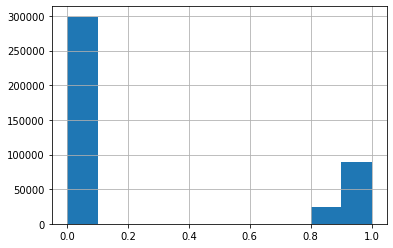

In [58]:
df_food['Pvalue'].hist()

# 300000 locus do not follow HWE
# 100000 locus follow HWE

In [0]:
m = df_food['Pvalue'] > 0.8

In [60]:
df_food.shape, df_food[m].shape

((413041, 24), (112738, 24))

In [61]:
df_food[m].head(10)

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029,Pvalue
21,TT,TC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.915127
22,TT,TC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.915127
23,AT,AC,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,0.827435
24,TC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.915127
25,TC,TC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.827435
26,AA,AG,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,0.915127
27,TT,TG,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.915127
28,CC,CG,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,0.915127
29,TT,TC,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,0.915127
32,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,1.000000


In [64]:
ls

gt_food_23accesions.pkl  merged.vcf.gz.mv.vcf


In [0]:
df_food.to_pickle('./gt_food_23accesions_withHWEpvalue.pkl')

In [66]:
ls

gt_food_23accesions.pkl                merged.vcf.gz.mv.vcf
gt_food_23accesions_withHWEpvalue.pkl


In [0]:
df_food_pvalue = pd.read_pickle('./gt_food_23accesions_withHWEpvalue.pkl')

In [68]:
df_food_pvalue.head()

,SRR7501150,SRR7501160,SRR7501167,SRR7501181,SRR7505765,SRR7505768,SRR7505771,SRR7505773,SRR7505774,SRR7505779,SRR7505780,SRR7505869,SRR7505873,SRR7505877,SRR7505879,SRR7505880,SRR7505882,SRR7505889,SRR7505890,SRR7511299,SRR7527615,SRR7834586,SRR7850029,Pvalue
0,CC,CC,AA,AA,AA,CC,CC,AA,CC,CC,CC,CC,CC,CC,AA,AA,CC,AA,CC,CC,CC,AA,AA,0.000002
1,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,CC,CC,CC,CC,TT,CC,TT,TT,0.000002
2,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG,TT,TT,0.000002
3,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,CC,CC,0.000002
4,TT,TT,CC,CC,CC,TT,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,TT,CC,CC,CC,TT,CC,CC,0.000002


In [0]:
# df_food.drop(['Pvalue'], axis=1) 하면 column이 pvalue인 부분 삭제됨

---